### Загрузим основные пакеты

In [1]:
import scipy as sp
import scipy.linalg as spla
import scipy.optimize as spopt
import scipy.stats as spst

import numpy as np
import numpy.linalg as npla

import statsmodels as sm
import statsmodels.api as sma
smfOLS = sma.regression.linear_model.OLS.from_formula
smfLGT = sm.discrete.discrete_model.Logit.from_formula

import seaborn as sb
import pandas as pd

import matplotlib.pyplot as plt

from inspect import signature as sig

In [2]:
# matplotlib image size and resolution
mpl_options = {"figsize":(8,8), "dpi":100}
sb.set(rc={'figure.figsize':(12,8)})

### Regression discontinuity

In [3]:
x = np.random.uniform(0,2, 1000)

In [4]:
def func(x):
    if x < 1:
        return .2*x
    if x >= 1:
        return .7*x - .25

In [5]:
y = np.array([func(i) for i in x]) + np.random.uniform(0,.2,1000)

<AxesSubplot:>

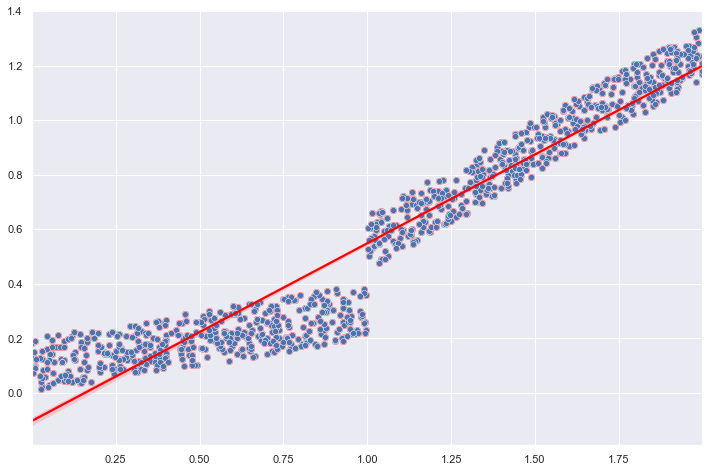

In [6]:
sb.regplot(x=x, y=y, color = 'red')
sb.scatterplot(x=x, y=y)

### How to fit these two regressions separately?

In [7]:
data = np.vstack((x,y))
data.shape

(2, 1000)

In [8]:
df = pd.DataFrame(data.T, columns = ['x', 'y'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   y       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [9]:
xleft = df[df.x<1].x.values
xright = df[df.x>=1].x.values

In [10]:
yleft = df[df.x<1].y.values
yright = df[df.x>=1].y.values

<AxesSubplot:>

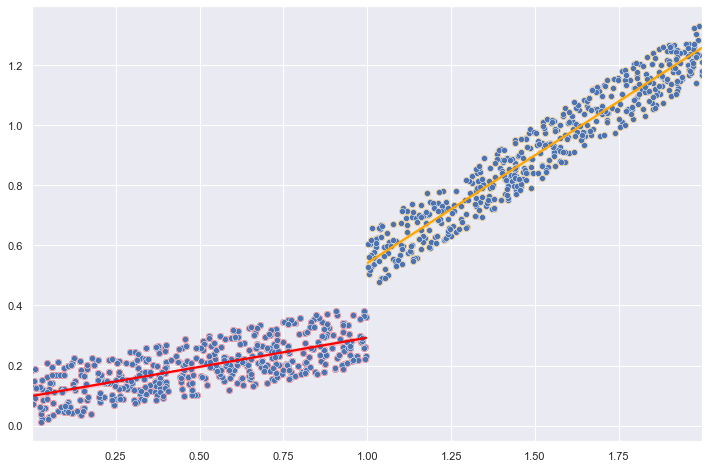

In [11]:
sb.regplot(x=xleft, y=yleft, color = 'red')
sb.regplot(x=xright, y=yright, color = 'orange')
sb.scatterplot(x=x, y=y)

### Assignment 1 (2 points). Write a function that computes the size of discontinuity in the OLS context with the data above.

In [12]:
def rd1(x, y, loc = 0):
    return 0

### But what if it is nonlinear and we want to use loess or lowess? The kernel will crash at the boundary, we need data smoothly continue "to the other side"

In [13]:
x = np.random.uniform(0,2, 1000)

In [14]:
def func(x):
    if x < 1:
        return np.sin(6*x)+3
    if x >= 1:
        return np.cos(6*x)+4

In [15]:
y = np.array([func(i) for i in x]) + np.random.uniform(0,1,1000)

<AxesSubplot:>

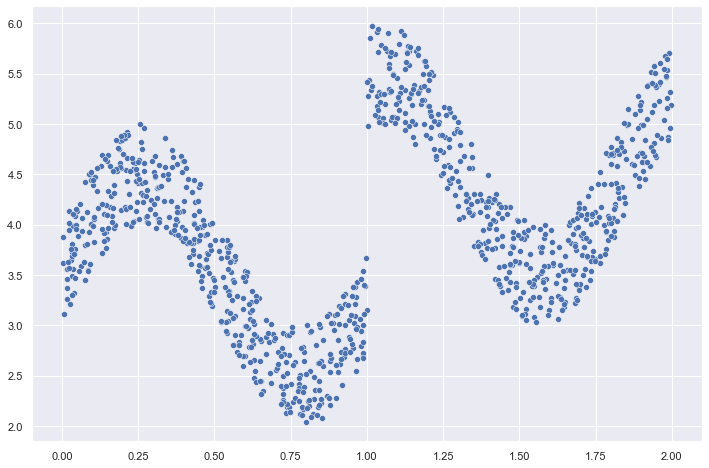

In [16]:
sb.scatterplot(x=x, y=y)

### Reflection method: mirror the data to the other side of the threshold, and use it to get the value at the boundary properly. Otherwise the estimate will fall towards zero

### Assignment 2 (3 points).Write a function that computes the size of discontinuity in the  context of local-CONSTANT regression with the data above, with boundary correction. Plot the fit. You can use any intermediate packages.

In [2]:
def rd2(x, y, loc = 0):
    return 0

### Assignment 3 (5 points).Write a function that computes the size of discontinuity in the  context of local-LINEAR regression with the data above, with boundary correction. Plot the fit. You have to do everything BY HAND.

In [3]:
def rd3(x, y, loc = 0, frac = .5):
    return 0